In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# Download data and import 
import gdown
file_id = "1Yct1NmYBxF9JJSYbIAil0yG5Qk_v8Hi9"
url = f"https://drive.google.com/uc?id={file_id}"


In [3]:
train_df = pd.read_csv(url)
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_9832\3000082517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

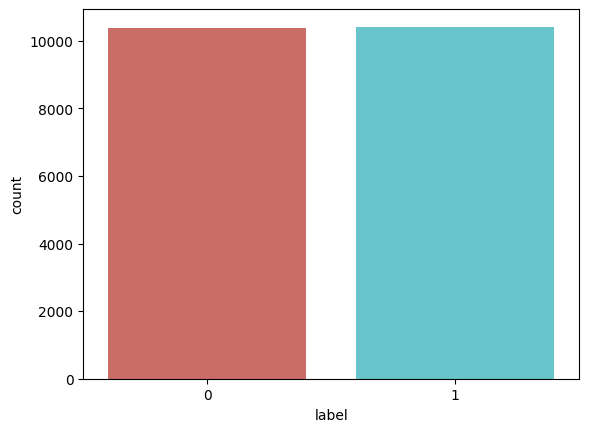

In [5]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')
create_distribution(train_df)

In [6]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
check finished.


In [7]:
train_df = train_df.dropna()

In [8]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB
check finished.


In [9]:
train_df.reset_index(drop= True,inplace=True)

In [10]:
label_train = train_df.label

In [11]:
train_df = train_df.drop("label", axis = 1)

In [12]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [13]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\SHOYEB
[nltk_data]     ANSARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SHOYEB
[nltk_data]     ANSARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\SHOYEB
[nltk_data]     ANSARI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\SHOYEB
[nltk_data]     ANSARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_9832\1765326005.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['text'][x] = review


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.2, random_state=0)

In [16]:
X_train.shape

(16608,)

In [17]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)

In [18]:
print(tfidf_X_train,tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4310871 stored elements and shape (16608, 146765)>
  Coords	Values
  (0, 8616)	0.03591793588221623
  (0, 109157)	0.016213715248916762
  (0, 144018)	0.02454117459499835
  (0, 90366)	0.045180464405216794
  (0, 95426)	0.025287254687813333
  (0, 38940)	0.0767252917649709
  (0, 115009)	0.180430810983907
  (0, 124990)	0.1916047023098878
  (0, 21428)	0.15423896869194717
  (0, 128879)	0.04788005784056122
  (0, 7666)	0.026869034670720694
  (0, 90490)	0.08627002006532737
  (0, 18061)	0.31270551250782314
  (0, 36666)	0.17726186939927085
  (0, 36662)	0.02655134425739942
  (0, 44303)	0.05852576065336838
  (0, 143538)	0.19213213795492906
  (0, 144044)	0.09606472084109222
  (0, 21916)	0.09417732813401164
  (0, 1373)	0.017367270232506577
  (0, 36760)	0.03198642348798466
  (0, 44904)	0.02360961444213141
  (0, 74889)	0.011589474946805104
  (0, 52002)	0.014834617493124183
  (0, 46339)	0.0386500869210021
  :	:
  (16607, 47761)	0.056774678856187

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 95.62%
Confusion matrix, without normalization


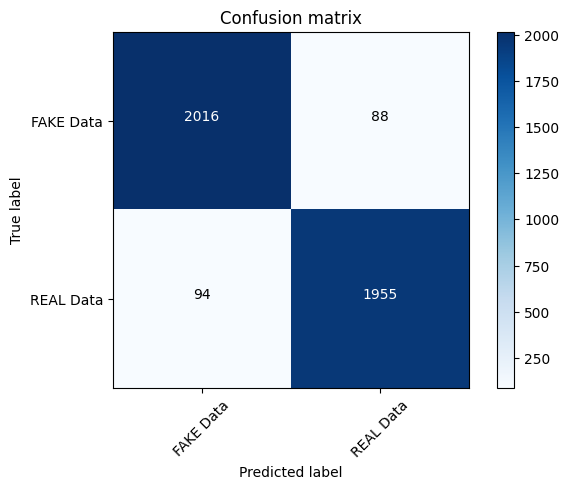

In [21]:
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [22]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2104
           1       0.96      0.95      0.96      2049

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



In [23]:
pickle.dump(classifier,open('./model.pkl', 'wb'))
pickle.dump(tfidf_v,open('vector.pkl', 'wb'))

In [24]:
loaded_model = pickle.load(open('./model.pkl', 'rb'))

In [ ]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)
    decision_score = loaded_model.decision_function(vectorized_input_data)[0]
    print(decision_score)
    confidence = 1 / (1 + np.exp(-decision_score))
    
    if prediction[0] == 1:
        print(f"Prediction of the News :  Looking Fake⚠ News📰 {round(confidence * 100, 2)}")
    else:
        print(f"Prediction of the News : Looking Real News📰 {round(confidence * 100, 2)}")

In [26]:
X_test[16236]

'washington conn television writer named amy vacationed mayflower grace inn built high hill true hollywood fashion m returned hometown los angeles brief visit spun star hollow charming new england small town resident troubadour star hollow would become setting gilmore girl cultishly popular dramedy ran seven season wb later cw last weekend fan woman many mother daughter descended rural town western connecticut population first gilmore girl fan fest come oklahoma minnesota far away brazil paid much per ticket see real star hollow meet actor play resident way wanted impossible experience waking life dream town built studio backlot star hollow instance would chilly pouring rain community green would become mud field would gazebo center town something washington depot one village within town conspicuously lack faced reality attendee cheerily persevered stood holding umbrella line stretched clear door hickory stick bookshop get signed copy cookbook eat like gilmore kristi carlson queued dro

In [27]:
Y_test[16236]

np.int64(0)

In [48]:
news=str(input("Enter the News:"))
fake_news_det(news) 

[0]
-1.3904384598977981
Prediction of the News : Looking Real News📰 19.93


In [29]:
X_new=tfidf_X_test[3]
prediction = loaded_model.predict(X_new)

if (prediction[0] == 1):
	print("Prediction of the News :  Looking Fake⚠ News📰 ")
else:
	print("Prediction of the News : Looking Real News📰 ")

Prediction of the News :  Looking Fake⚠ News📰 
